## Writing the Perceptron Algorithm
For a detailed explanation of the Perceptron Algorithm, please refer to the following link: [Perceptron: An Artificial Neural Network to Classify Data](https://apat.io/posts/perceptron-an-artificial-neural-network-to-classify-data)

### Running the Code
To run the code in this notebook, you can use either Google Colab or Jupyter Notebook. Follow the steps below to execute the code:

1. Open Google Colab or Jupyter Notebook.
2. Create a new notebook or open an existing one.
3. Copy and paste the code cells into the notebook.
4. Run each code cell sequentially by clicking the "Run" button or using the keyboard shortcut (Shift + Enter).
5. Make sure to run the cells in the correct order to avoid any errors or dependencies.

Note: If you are using Jupyter Notebook, ensure that the required libraries are installed by running the necessary import statements in a separate code cell.

Happy coding!

### Importing Libraries and create a dataset
We are going to create a dataset of ten people with their age, salary, and debt. We are also going to create an expected output for each person. The expected output is 0 if the person has a good credit score and 1 if the person has a bad credit score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dataset of ten people -> [age, salary]
dataset = np.array([
    [22, 60000],
    [25, 58801],
    [30, 70000],
    [35, 93500],
    [40, 120000],
    [45, 95000],
    [50, 110000],
    [55, 120000],
    [58, 29491],
    [62, 73679]
])

# Normalize the dataset
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Expected output
expected_output = np.array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

dataset

array([[-1.51252526, -0.81714392],
       [-1.2878928 , -0.85965493],
       [-0.91350536, -0.46259002],
       [-0.53911792,  0.37061165],
       [-0.16473047,  1.31017949],
       [ 0.20965697,  0.42379473],
       [ 0.58404441,  0.95562558],
       [ 0.95843185,  1.31017949],
       [ 1.18306432, -1.89885242],
       [ 1.48257427, -0.33214964]])

### Scatter plot of the dataset
We are going to create a scatter plot of the dataset to see how the data is distributed.

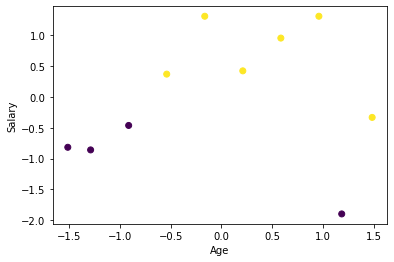

In [2]:
# Scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], c=expected_output)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

As you can see, the data is not linearly separable. This means that we cannot draw a straight line to separate the data into two classes. However, the Perceptron algorithm can still be used to classify the data.

### Activation function and Perceptron algorithm
For this example, we are going to use the tanh activation function. The tanh function is a hyperbolic tangent function that maps the input to the range (-1, 1). The Perceptron algorithm is going to use the tanh function to classify the data.

In [3]:
# Activation function
def activation_function(x):
    return np.tanh(x)

### Perceptron algorithm
The Perceptron algorithm is used to train the Perceptron by adjusting the weights until it correctly classifies the input data. This is done by comparing the output of the Perceptron to the expected output and adjusting the weights accordingly. The parameters of the algorithm are the dataset, the expected output, the learning rate, and the number of epochs.
- **Dataset:** The dataset of input values.
- **Expected output:** The expected output for each input value.
- **Learning rate:** The learning rate is used to control how much the weights are adjusted during training.
- **Epochs:** The number of epochs is the number of times the Perceptron is trained on the dataset.

In [4]:
# Perceptron algorithm
def perceptron_algorithm(dataset, expected_output, learning_rate, epochs):
    # Random weights with 3 elements (2 for the dataset and 1 for the bias)
    weights = np.random.rand(3)
    # List to store the errors
    errors = []

    # Epochs define how many times the algorithm will run
    for epoch in range(epochs):
        total_error = 0
        # Iterate over the dataset
        for i in range(len(dataset)):
            # Insert the bias into the dataset
            x = np.insert(dataset[i], 0, 1)
            # Calculate the output using the activation function
            y = activation_function(np.dot(x, weights))
            # Calculate the error using the expected output
            error = expected_output[i] - y
            # Update the weights
            weights += learning_rate * error * x
            # Sum the error to the total error
            total_error += error
        # Print the epoch, input, weights, output and error
        print(f"Epoch {epoch + 1}/{epochs}, x: {x}, weights: {weights}, y: {y}, error: {error}")
        # Append the total error to the errors list
        errors.append(total_error)
    return weights, errors

### Training the Perceptron
We are going to train the Perceptron using the dataset and the expected output. We are going to use a learning rate of 0.1 and 100 epochs.

In [5]:
# Training the Perceptron
learning_rate = 0.1
epochs = 100
weights, errors = perceptron_algorithm(dataset, expected_output, learning_rate, epochs)

Epoch 1/100, x: [ 1.          1.48257427 -0.33214964], weights: [0.67896301 0.16105381 0.7177128 ], y: 0.4636022982353689, error: 0.5363977017646311
Epoch 2/100, x: [ 1.          1.48257427 -0.33214964], weights: [0.82686996 0.24631664 0.65581369], y: 0.7046713146629855, error: 0.2953286853370145
Epoch 3/100, x: [ 1.          1.48257427 -0.33214964], weights: [0.90511572 0.30465893 0.66253126], y: 0.7882015854804906, error: 0.21179841451950943
Epoch 4/100, x: [ 1.          1.48257427 -0.33214964], weights: [0.9573239  0.34093923 0.69055526], y: 0.8261578445298302, error: 0.1738421554701698
Epoch 5/100, x: [ 1.          1.48257427 -0.33214964], weights: [0.99884155 0.36461139 0.72153015], y: 0.848146326205305, error: 0.15185367379469505
Epoch 6/100, x: [ 1.          1.48257427 -0.33214964], weights: [1.03438373 0.38151147 0.75058021], y: 0.8631093041109021, error: 0.13689069588909786
Epoch 7/100, x: [ 1.          1.48257427 -0.33214964], weights: [1.06568991 0.39467758 0.77676972], y: 0

### Plotting the errors
We are going to plot the errors to see how the Perceptron is trained.

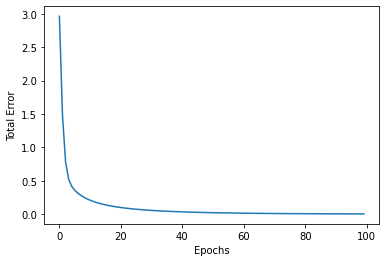

In [6]:
# Plotting the errors
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.show()

### Testing the Perceptron
We are going to test the Perceptron using the same dataset. We are going to compare the output of the Perceptron to the expected output to see how well the Perceptron has been trained.

In [7]:
# First, an array new_person is created with the data of the new person,
# which in this case are the age (33) and the salary (80000).
new_person = np.array([33, 80000])
# Then, these data are normalized using the same scaler object that was used to normalize
# the training data. It is important to use the same scaler object to ensure that
# the data is transformed in the same way.
new_person = scaler.transform([new_person])
# Next, a 1 is inserted at the beginning of the normalized array.
# This corresponds to the bias in the perceptron model, which allows the model to move the
# activation function to the left or right, providing more flexibility to the model.
x = np.insert(new_person[0], 0, 1)
# Then, the dot product of this array and the model weights is calculated,
# and the result is passed to the activation function. This produces the model's output y,
# which is the predicted classification for the new person.
y = activation_function(np.dot(x, weights))
# Finally, the array x and the output y are printed.
print(f"Test, x: {x}, y: {y}")
# Also print if the person is accepted or not
print("Accepted" if y > 0 else "Not accepted")

Test, x: [ 1.         -0.68887289 -0.10803612], y: 0.7551224205565439
Accepted
